In [10]:
import os
os.getcwd()
os.chdir('../src')

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from d01_data.load_data import load_from_db
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta
import pickle
import time

In [12]:
POWER_DATA=1
power_df = load_from_db(POWER_DATA, notebook=True)
power_df.set_index("Time", inplace=True)

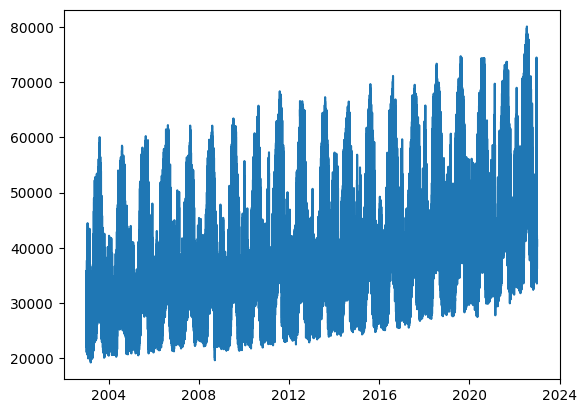

In [13]:
ercot = power_df["ERCOT"]
plt.plot(ercot)

In [7]:
adf_results = adfuller(ercot.values)

In [9]:
print(f'ADF Statistic: {adf_results[0]}')
print(f'p-value: {adf_results[1]}')

ADF Statistic: -12.128231738929712
p-value: 1.7603320083622594e-22


Since p-value < 0.05, there is reason to reject the null hypothesis, therefore, ercot data is stationary. This is slightly confusing because there appears to be a trend.

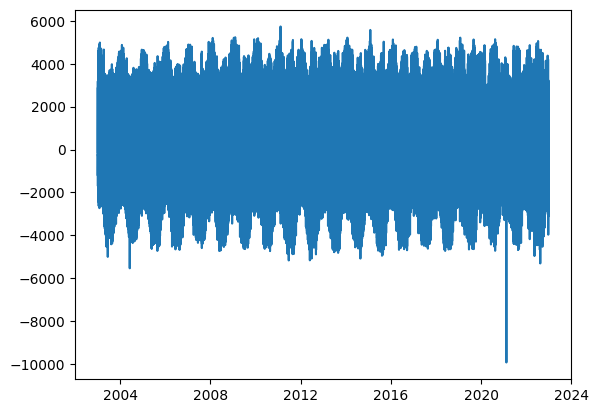

In [14]:
ercot_diff = ercot.diff()
plt.plot(ercot_diff)

This looks much more stationary. From inspection, we see a constant mean and variance, but there might be a bit of seasonality. Might be useful to set d=1 for an ARIMA model.